## Logistic_Regression_Model_Evaluation (Assignment_4) 

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
dff = pd.read_csv('C:/Users/WOYES/Desktop/bankfull.csv', delimiter = ';')
dff.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# select only the needed features
df = dff[["age","job","marital","education",'balance','housing','contact','day','month','duration','campaign',
'pdays','previous','poutcome','y']]

df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [5]:
# check missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# check most frequent observation for education column
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

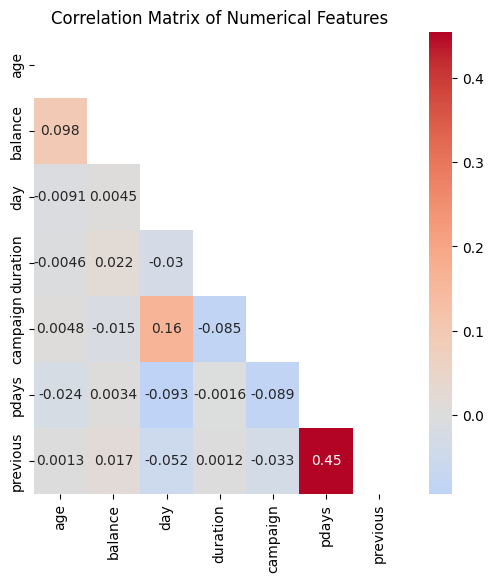

In [7]:
# find the correlation in the numerical features

#categorical features
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome']

#numerical features
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 


corr_matrix = df[numerical].corr()

# visualize the correlation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
# encode the target variable

df['y']=df['y'].replace({'yes':1,'no':0})
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [9]:
# split the dataset to train/val/test
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)

# print
len(df_full_train),len(df_train), len(df_val), len(df_test)

(36168, 27126, 9042, 9043)

In [10]:
# sort the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# split out the target feature
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

In [12]:
# delete the target feature from the splitted dataset
del df_train['y']
del df_val['y']
del df_test['y']

In [13]:
#  calculate the mutual score between the categorical features
from sklearn.metrics import mutual_info_score

def mutual_info_sub_score(series):
    return mutual_info_score(series, df_full_train['y'])

In [14]:
df_full_train[categorical].apply(mutual_info_sub_score).sort_values(ascending =False)

poutcome     0.029257
month        0.024774
contact      0.014164
housing      0.009800
job          0.007765
education    0.002458
marital      0.002019
dtype: float64

In [15]:
# using one hot encoding on the categorical dataset
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
train_dict = df_train[numerical  + categorical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[numerical + categorical].to_dict(orient = 'records')
X_val = dv.fit_transform(val_dict)


In [16]:
X_val[0]

array([ 38., -10.,   2.,   0.,   0.,   1.,  17.,  61.,   0.,   1.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,
         0.,   1.,   0.])

In [17]:
#  fitting the model on the training dataset

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [18]:
y_pred =model.predict_proba(X_val)[:,1]

In [19]:
churn = y_pred >=0.5

In [20]:
#  calculating the accuracy score

(y_val==churn).mean()

0.9013492590134926

In [21]:
from IPython.display import display

global_churn = df_full_train['y'].mean()

for c in categorical:
    print (c)
    df_group = df_full_train.groupby(c)['y'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['ratio'] = df_group['mean'] / global_churn
    display (df_group)
    print()
    print()


job


,mean,count,diff,ratio
job,,,,
admin.,0.119894,4137,0.003824,1.032947
blue-collar,0.072252,7806,-0.043817,0.622490
entrepreneur,0.086587,1178,-0.029482,0.745997
housemaid,0.093812,1002,-0.022257,0.808243
management,0.135467,7500,0.019397,1.167117
retired,0.222590,1815,0.106520,1.917727
self-employed,0.122862,1286,0.006792,1.058518
services,0.090746,3350,-0.025323,0.781827
student,0.278976,742,0.162906,2.403524




marital


,mean,count,diff,ratio
marital,,,,
divorced,0.119720,4143,0.003651,1.031451
married,0.100578,21804,-0.015492,0.866532
single,0.147637,10221,0.031568,1.271973




education


,mean,count,diff,ratio
education,,,,
primary,0.086377,5476,-0.029693,0.744183
secondary,0.105303,18670,-0.010767,0.907238
tertiary,0.148970,10539,0.032901,1.283460
unknown,0.127444,1483,0.011375,1.098001




housing


,mean,count,diff,ratio
housing,,,,
no,0.166407,16033,0.050337,1.433683
yes,0.075987,20135,-0.040082,0.654669




contact


,mean,count,diff,ratio
contact,,,,
cellular,0.148270,23464,0.032200,1.277422
telephone,0.137128,2319,0.021059,1.181431
unknown,0.038613,10385,-0.077456,0.332675




month


,mean,count,diff,ratio
month,,,,
apr,0.202645,2344,0.086576,1.745895
aug,0.110954,4966,-0.005115,0.955932
dec,0.464481,183,0.348411,4.001749
feb,0.156723,2112,0.040654,1.350256
jan,0.098678,1135,-0.017391,0.850167
jul,0.091927,5537,-0.024142,0.792000
jun,0.098888,4318,-0.017181,0.851976
mar,0.516043,374,0.399973,4.445983
may,0.065219,10963,-0.050850,0.561900




poutcome


,mean,count,diff,ratio
poutcome,,,,
failure,0.126891,3901,0.010821,1.093229
other,0.170341,1497,0.054271,1.467575
success,0.641322,1210,0.525253,5.525332
unknown,0.090392,29560,-0.025677,0.778779


In [22]:
model = LogisticRegression(solver='liblinear', C=100, max_iter=1000, random_state=42).fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:,1]
chur = y_pred >=50
display((y_val==chur).mean())

0.8816633488166334

In [23]:
#categorical features
small_cat = ['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome']

#numerical features
small_num = [ 'age', 'balance','day', 'duration', 'campaign', 'pdays'] #age

In [24]:
# using one hot encoding on the categorical dataset
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
train_dic = df_train[small_num  + small_cat].to_dict(orient = 'records')
X_trains = dv.fit_transform(train_dic)

val_dic = df_val[small_num + small_cat].to_dict(orient = 'records')
X_vals = dv.fit_transform(val_dic)


In [25]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_trains, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [26]:
y_preds =model.predict_proba(X_vals)[:,1]
chu = y_preds >=50
(y_val==chu).mean()

0.8816633488166334

In [27]:
C = [0.01, 0.1, 1, 10, 100]

for i in C:
    model = LogisticRegression(solver='liblinear', C=i, max_iter=1000, random_state=42).fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]  
    churn = y_pred >= 0.5  
    accuracy = (y_val == churn).mean()  
    display(round(accuracy, 3))  


0.898

0.901

0.901

0.901

0.901

In [28]:
actual_pos = y_val==1
actual_neg = y_val ==0

In [29]:
t= 0.5
predict_pos = y_pred>=t
predict_neg = y_pred<t

In [30]:
tp = (predict_pos & actual_pos).sum()
tn = (predict_neg & actual_neg).sum()

fp =(predict_pos & actual_neg).sum()
fn = (predict_neg & actual_pos).sum()

In [31]:
confusion_matrix = np.array([[tn,fp],
                            [fn, tp]])

confusion_matrix

array([[7778,  194],
       [ 700,  370]])

In [32]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.86, 0.02],
       [0.08, 0.04]])

In [33]:
accuracy = (tn +tp)/(tn+tp+fp+fn)
accuracy

0.9011280690112807

In [34]:
#  precision and recall
# recall shows number of churing customers correctly identified
# precision shows how accurate our churning predicition  for all customers 

p = tp /(tp+fp)
r = tp/(tp + fn)

p.round(2), r.round(2)

(0.66, 0.35)

In [35]:
# f1 score

f = 2* ((p * r)/(p + r))
f

0.45287637698898414

In [36]:
#  ROC curve

fpr = fp/(fp+tn)
tpr = tp/(fn+tp) #similar to recall

fpr, tpr

(0.024335173105870547, 0.34579439252336447)

In [62]:
score = []
threshold = np.linspace(0,1, 101)

for t in threshold:
    actual_pos = y_val==1
    actual_neg = y_val ==0

    predict_pos = y_pred>=t
    predict_neg = y_pred<t

    tp = (predict_pos & actual_pos).sum()
    tn = (predict_neg & actual_neg).sum()

    fp =(predict_pos & actual_neg).sum()
    fn = (predict_neg & actual_pos).sum()

    fpr = fp/(fp+tn)
    tpr = tp/(fn+tp)

    precision = tp /(tp+fp)
    recall = tp/(tp + fn)

    f1 = 2* ((precision * recall)/(precision + recall))

    score.append((t,tp,tn,fp,fn,fpr,tpr,precision, recall,f1))



In [69]:
df_scores[df_scores['f1']==0.5896907216494846]

,thresold,tp,tn,fp,fn,fpr,tpr,precision,recall,f1
21,0.21,715,7332,640,355,0.080281,0.668224,0.527675,0.668224,0.589691


In [63]:
columns =['thresold','tp', 'tn', 'fp', 'fn','fpr','tpr','precision', 'recall','f1']
df_scores = pd.DataFrame(score, columns = columns)
df_scores[::10]

,thresold,tp,tn,fp,fn,fpr,tpr,precision,recall,f1
0,0.0,1070,0,7972,0,1.000000,1.000000,0.118337,1.000000,0.211630
10,0.1,933,6453,1519,137,0.190542,0.871963,0.380506,0.871963,0.529813
20,0.2,732,7285,687,338,0.086177,0.684112,0.515856,0.684112,0.588188
30,0.3,573,7564,408,497,0.051179,0.535514,0.584098,0.535514,0.558752
40,0.4,458,7694,278,612,0.034872,0.428037,0.622283,0.428037,0.507198
50,0.5,370,7778,194,700,0.024335,0.345794,0.656028,0.345794,0.452876
60,0.6,285,7844,128,785,0.016056,0.266355,0.690073,0.266355,0.384356
70,0.7,218,7879,93,852,0.011666,0.203738,0.700965,0.203738,0.315713
80,0.8,151,7908,64,919,0.008028,0.141121,0.702326,0.141121,0.235019
90,0.9,79,7948,24,991,0.003011,0.073832,0.766990,0.073832,0.134697


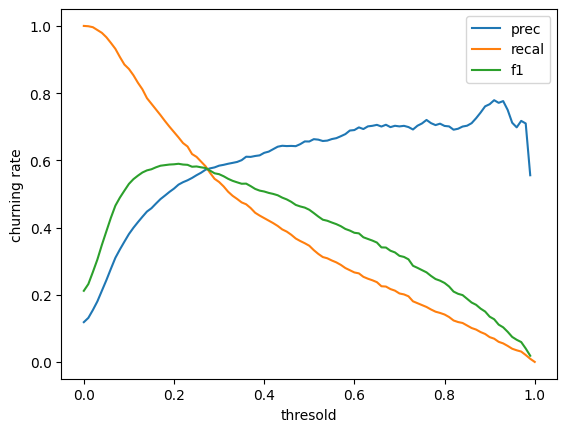

In [65]:
plt.plot(df_scores['thresold'], df_scores['precision'], label ='prec')
plt.plot(df_scores['thresold'], df_scores['recall'], label ='recal')
plt.plot(df_scores['thresold'], df_scores['f1'], label ='f1')

plt.xlabel('thresold')
plt.ylabel('churning rate')
plt.legend()
plt.show();

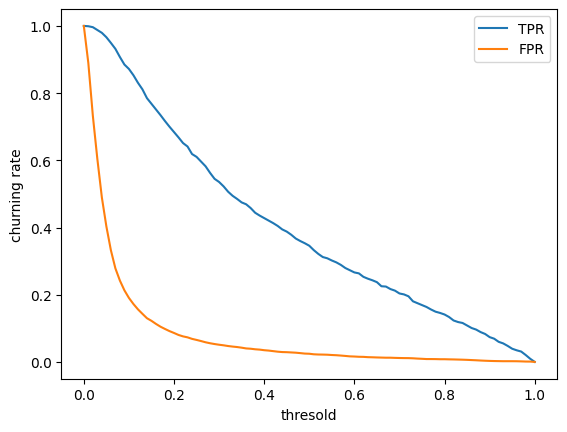

In [40]:
plt.plot(df_scores['thresold'], df_scores['tpr'], label ='TPR')
plt.plot(df_scores['thresold'], df_scores['fpr'], label ='FPR')
plt.xlabel('thresold')
plt.ylabel('churning rate')
plt.legend()
plt.show();

In [41]:
#  creating an ideal model

num_neg = (y_val==0).sum()
num_pos =(y_val==1).sum()


In [42]:
y_ideal = np.repeat([0,1], [num_neg,num_pos])
y_ideal_pred = np.linspace(0,1,len(y_val))

In [43]:
((y_ideal_pred>=0.881)==y_ideal).mean()

0.9993364299933643

In [44]:
def tpr_fpr_df(y_val,y_pred):
    score = []
    threshold = np.linspace(0,1, 101)

    for t in threshold:
        actual_pos = y_val==1
        actual_neg = y_val ==0

        predict_pos = y_pred>=t
        predict_neg = y_pred<t
    
        tp = (predict_pos & actual_pos).sum()
        tn = (predict_neg & actual_neg).sum()
    
        fp =(predict_pos & actual_neg).sum()
        fn = (predict_neg & actual_pos).sum()
    
        fpr = fp/(fp+tn)
        tpr = tp/(fn+tp)
    
        score.append((t,tp,tn,fp,fn,fpr,tpr))

    columns =['thresold','tp', 'tn', 'fp', 'fn','fpr','tpr']
    df_scores = pd.DataFrame(score, columns = columns)
    return df_scores

In [45]:
df_ideal = tpr_fpr_df(y_ideal, y_ideal_pred)
df_ideal[::10]

,thresold,tp,tn,fp,fn,fpr,tpr
0,0.0,1070,0,7972,0,1.000000,1.000000
10,0.1,1070,905,7067,0,0.886478,1.000000
20,0.2,1070,1809,6163,0,0.773081,1.000000
30,0.3,1070,2713,5259,0,0.659684,1.000000
40,0.4,1070,3617,4355,0,0.546287,1.000000
50,0.5,1070,4521,3451,0,0.432890,1.000000
60,0.6,1070,5425,2547,0,0.319493,1.000000
70,0.7,1070,6329,1643,0,0.206096,1.000000
80,0.8,1070,7233,739,0,0.092699,1.000000
90,0.9,905,7972,0,165,0.000000,0.845794


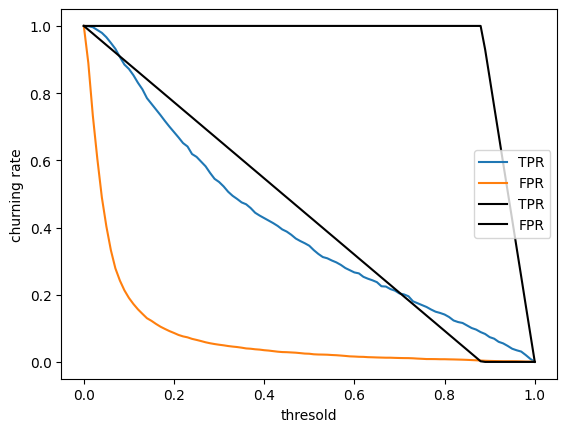

In [46]:
plt.plot(df_scores['thresold'], df_scores['tpr'], label ='TPR')
plt.plot(df_scores['thresold'], df_scores['fpr'], label ='FPR')

plt.plot(df_ideal['thresold'], df_ideal['tpr'], label ='TPR', color ='black')
plt.plot(df_ideal['thresold'], df_ideal['fpr'], label ='FPR', color ='black')

plt.xlabel('thresold')
plt.ylabel('churning rate')
plt.legend()
plt.show();

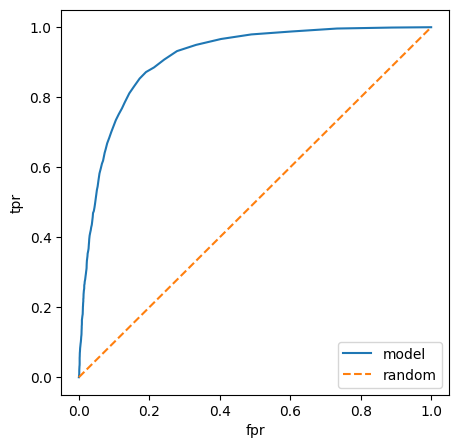

In [47]:
# ploting the roc auc

plt.figure(figsize=(5,5))
plt.plot(df_scores['fpr'], df_scores['tpr'], label = 'model')
plt.plot([0,1], [0,1], label ='random', linestyle = '--') #random baseline
# plt.plot(df_ideal['fpr'], df_ideal['tpr'], label = 'ideal') # ideal curve (impossible to reach)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()


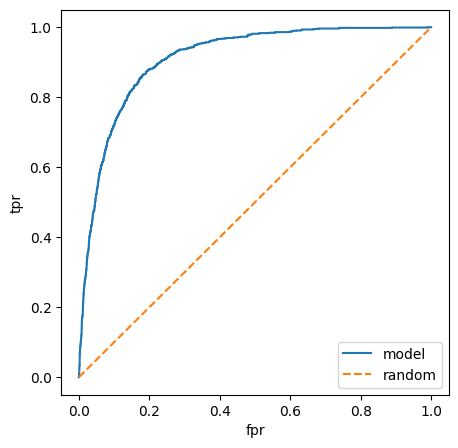

In [48]:
#  drawing the roc curve using a library (easy to use direct)

from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_val,y_pred)


plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1], [0,1], label ='random', linestyle = '--') #random baseline
# plt.plot(df_ideal['fpr'], df_ideal['tpr'], label = 'ideal') # ideal curve (impossible to reach)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()


In [49]:
from sklearn.metrics import auc
'''auc shows the percentage probability of correctness of any randomly 
selected positive customer(churn) has higher score than randomly selected
negative sample''' 

auc(fpr,tpr)

0.9103719326052399

In [50]:
# manually computed one very close to the library own
auc(df_scores['fpr'], df_scores['tpr'])

0.9102277949458618

In [51]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [52]:
len(y_train), len(df['age'])

(27126, 45211)

In [71]:

for i in numerical:
    fpr1,tpr1, threshold1 = roc_curve(y_train, -df_train[i])
    display (i, auc(fpr1,tpr1))

'age'

0.5072154616891561

'balance'

0.4131681090112155

'day'

0.5250167906149042

'duration'

0.1934369157787872

'campaign'

0.5682816518810498

'pdays'

0.40591021118767584

'previous'

0.39655426581797404

### Cross validation 

In [94]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')

    dv =DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter =1000).fit(X_train, y_train)

    return dv , model

In [95]:
dv, model =train(df_train, y_train,C=0.001)

In [81]:
def predict(df, dv, y_train):
    dicts = df[categorical + numerical].to_dict(orient = 'records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [82]:
y_pred = predict(df_val, dv, model)

In [96]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle=True, random_state =1)

In [97]:
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)

(28934, 7234)

In [98]:
from sklearn.metrics import roc_auc_score

In [89]:
!pip install tqdm

In [90]:
from tqdm.auto import tqdm

In [103]:
n_splits =5
for C in [0.000001, 0.001, 1]:
    

    scores = []
    
    for train_idx, val_idx in tqdm(kfold.split(df_full_train), total = n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train['y'].values
        y_val = df_val['y'].values
    
        dv, model = train(df_train,y_train, C=C )
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f' % (C,np.mean(scores), np.std(scores)))

  0%|          | 0/5 [00:00<?, ?it/s]

C=1e-06 0.822 +- 0.005


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.001 0.885 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=1 0.901 +- 0.008


In [105]:
dv, model = train(df_full_train, df_full_train['y'].values, C=1.0 )
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8938033563433764

In [101]:
np.mean(scores), np.std(scores)

(0.9011981976546029, 0.008222324012754498)